In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")

In [2]:
reddit = pd.read_csv('./Data/Reddit_Crypto-Copy1.csv')

reddit.title = reddit.title.str.lower()
reddit = reddit.drop('Unnamed: 0',axis=1)
reddit.date = pd.to_datetime(reddit['date']).dt.date

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

reddit_sent = pd.DataFrame(columns=['compound','neg','neu','pos'],index=None)
results = []
for sentence in tqdm(reddit.title):
    ss = sia.polarity_scores(sentence)
    results.append(ss)
reddit_sent = reddit_sent.append(results)

reddit = reddit.merge(reddit_sent,left_index=True,right_index=True)

reddit['neg_s'] = reddit['neg']*reddit['score']
reddit['pos_s'] = reddit['pos']*reddit['score']
reddit['neu_s'] = reddit['neu']*reddit['score']

reddit['neg_c'] = reddit['neg']*reddit['comments']
reddit['pos_c'] = reddit['pos']*reddit['comments']
reddit['neu_c'] = reddit['neu']*reddit['comments']

#one hot encoded pos score col
reddit['eg_ohe'] = reddit['pos'] - reddit['neg']
reddit['pos_ohe'] = reddit['eg_ohe'].apply(lambda x: 1 if x>0 else 0)
reddit['neg_ohe'] = reddit['eg_ohe'].apply(lambda x: 1 if x<0 else 0)
#tqdm

/Users/Nahel/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
100%|██████████| 82170/82170 [02:18<00:00, 593.75it/s]


In [16]:
reddit_gr = pd.DataFrame(reddit.groupby('date')['pos_s','neg_s','pos_c','neg_c','comments','score','pos_ohe','neg_ohe'].sum())

In [17]:
reddit_gr.index = pd.to_datetime(reddit_gr.index)

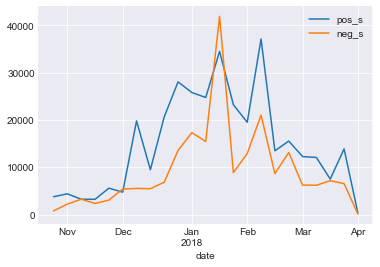

In [34]:
reddit_gr[['pos_s','neg_s']].resample('w').sum().plot()

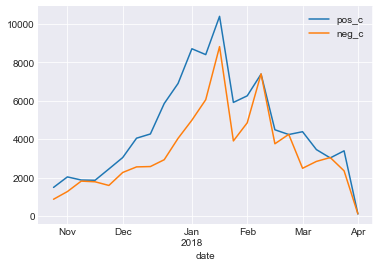

In [31]:
reddit_gr[['pos_c','neg_c']].resample('w').sum().plot()

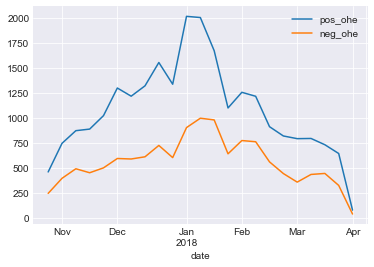

In [32]:
reddit_gr[['pos_ohe','neg_ohe']].resample('w').sum().plot()